# Clustering

In this project, we will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Part A 

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

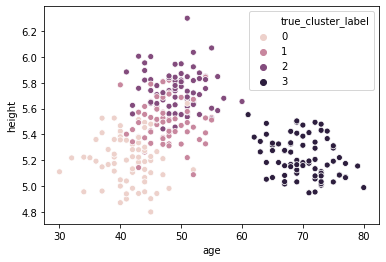

In [2]:
#Loading the data into a pandas dataframe
df = pd.read_csv('age_height_data.csv')

#Plotting a scatter plot of the two variables age and height and colouring the dots according to their true_cluster_label
sns.scatterplot(df['age'],df['height'], hue=df['true_cluster_label'])

## Part B 

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

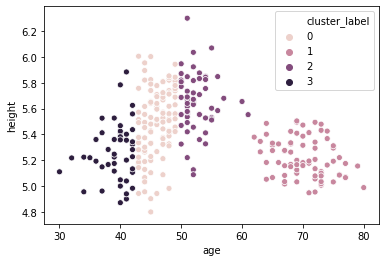

In [3]:
#Creating the pipeline
cl_pipe = Pipeline([
    ('aggcl',KMeans(n_clusters=4))
])

#Defining X
X = df.drop('true_cluster_label', axis='columns')

#Predicting cluster labels
df['cluster_label'] = cl_pipe.fit_predict(X)

#Plotting a scatter plot of the two variables age and height and colouring the dots according to their cluster_label
sns.scatterplot(df['age'],df['height'], hue=df['cluster_label'])

## Part C 

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

No, it doesn't look like a true cluster label. The issue is that the differences between age cases are large and the difference between hight cases are small due to the different scales, which are not comparable, used by age and height. This led age to be the only real driver of distance.

## Part D 

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

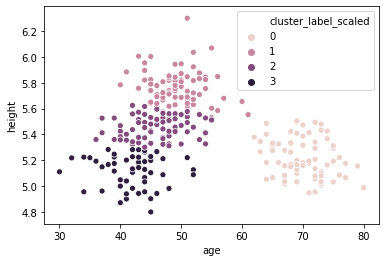

In [4]:
#Creating the pipeline with StandardScaler
cl_pipe_scaler = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl',KMeans(n_clusters=4))
])

#Predicting cluster labels 
df['cluster_label_scaled'] = cl_pipe_scaler.fit_predict(X)

#Plotting a scatter plot of the two variables age and height and colouring the dots according to their cluster_label_scaled
sns.scatterplot(df['age'],df['height'], hue=df['cluster_label_scaled'])

## Comment

Scaling has helped the clustering of the predicted clusters look more like the true clusters. After normalizing the data, clustering worked much better because no one feature(in our case that was age) dominated the distance calculations. 

## Part E 

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Create an elbow plot for this data.

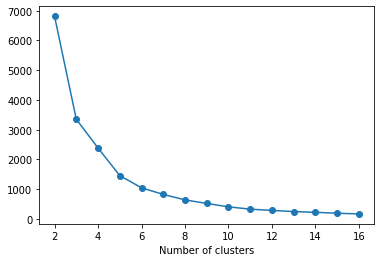

In [5]:
#Getting the upper bound for the clusters 
num_rows = df.shape[0]
upper_range = int(np.round(np.sqrt(num_rows)))

#Calculating the scores of the value of X on the K-means objective. 
scores = []
for i in range(2, upper_range):
    km = KMeans(n_clusters=i)
    km.fit(X)
    #Note we are using negative below because score returns the opposite of the value of X on the K-means objective.
    score = - km.score(X)
    scores.append(score)

#Plotting the result
plt.plot(range(2, upper_range), scores, marker='o')
plt.xlabel('Number of clusters')
plt.show()

## Part F 

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

The elbow for this data appears to be at 5. We know that the algorithm's objective function will decrease as the samples get closer to the centroids they are assigned to. Therefore, using the elbow plot above our goal is to pick a value for k where the decrease in the algorithm's objective function between that value and the next value appears to be small. Also, note that even though adding a bigger number of clusters results in smaller value for the algorithm's objective function this can also create overfitting. For those reasons, we shouldn't keep adding clusters to make the algorithm's objective function as small as possible.

## Part G 

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

1) Because close by points can't always be similar. To explain let's first identify the two requirements of clustering from the paper. The requirements are that similar elements(by implementing the distance function) share the same cluster and members of each cluster are all similar. To convey the author's point on why the two requirements of clustering conflict with one another we will think about those requirements abstractly. The goal of partitional clustering is to have clusters such that x and y are in the same cluster gives a good approximation to the input relation that x is similar to y. Unfortunately, this is not always the case becausae x and y belong to the same cluster is a transitive relation while x is similar to y may violate transitivity. 

2) The author criticizes the theoretician's approach to clustering because of their focus on algorithms run time, algorithms efficient approximation for clustering objective minimization, etc. There are very few theoreticians who gave attention to understanding and elaborating on the clustering properties that their algorithms offer, how they differ from existing ones, and what tasks are those algorithms suitable for. The author argues that a suitable choice of an algorithm to the task on hand makes a much bigger impact than a better algorithm run time or efficiency. 

3) The author argues that practitioners choices of clustering algorithm have been greatly influenced by algorithms popularity, familiarity, ease of use, etc. instead of giving attention to understanding the nature of data on hand, the properties or features of the clustering algorithms they are using, the parameters that may need to tune in the algorithms to make it more suitable for their clustering task, etc. Consequently, practitioners may not be fully aware of the implications of their choices. 


4) As a practitioner, I would focus on developing an in-depth understanding of the data I have on hand and the properties or features of available clustering algorithms. Then analyze how each of those features relates to the clustering task that I am handling and identify any tunning parameters of the algorithms that may make the algorithms more suitable to my clustering task and/or data. Based on the analysis and research result I would then choose the top 2-3 most suitable algorithms and the worst 2-3 algorithms to do the clustering. Then I would run the algorithms and compare their final outputs to see if my analysis was accurate and to make a final decision on the best algorithm for the task on hand.